### ML101 : Evaluating a classifier, selecting a model : The basics
31-08-2016,  
Jan Fait,  
Digital Marketing,
Munich

In [16]:
%matplotlib inline
import numpy as np

## Theory

Booo!

### Donald Trump approach to machine learning
+ See the data
+ Feed them all in a model
+ Check prediction accuracy
+ Change model parameters around
+ Deploy model
+ Make Machine Learning great again

![](http://www.anaffairfromtheheart.com/wp-content/uploads/2015/10/tony-fuggedaboutit-300x199.jpg)

### Train and Test paradigms (1)

If you are 'data rich', you go like this and you don't touch the 'test' at all:

![](http://srv-marketing1.muc.ecircle.de/utils/traintest.png)

Ok, but when am I data rich?

[See Curse of Dimensionality](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)

Well, you are mostly not, unless you have a continuous stream of data (and enough positive events), so you go like:

![](http://srv-marketing1.muc.ecircle.de/utils/traintest2.png)



### Train and Test paradigms (2)

With just Train and Test sets, this is what you get when tuning your model 

![](https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson04/model_complexity.png)

### Train and Test paradigms (3)

+ As we include more predictors, space coverage improves and training error goes down
+ At some point your model starts adjusting to the training data ('overfitting') and does not 'generalize' well.

> Good generalization is our goal! Lowest BIAS and VARIANCE of the model.

### Train and Test paradigms (4)

#### Variance
> an amount by which our approximation function/model would change if we estimated it using a different training data set

#### Bias
> error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model

Lowest **Variance** and **Bias** are commonly achieved with an intermediate complexity. The lowest point of the Test Error curve

## Practical part

Yaaaay!

###  Data
+ 500 observations of fake data 
+ 3 continuous predictors 
+ 1 categorical response with 2 classes [0,1]
+ Tip : [Generate correlated data from a defined covariance matrix](https://scipy.github.io/old-wiki/pages/Cookbook/CorrelatedRandomSamples.html)  
+ Or even use the Scikit native df,resp = make_classification(n_samples, random_state)

In [17]:
#pandas is a popular package for working with tabular data as data.frames, yes almost like Spark data.frames
import pandas as pd
#read in the data, define separator
df = pd.read_csv('../data/datasets/fake_data_1.csv', sep=',')
#show a truncated data frame
df.values

#simple validation set taking 0.8 of data, defined random seed
train=df.sample(frac=0.8,random_state=200)
#inverse selection for the test set
test=df.drop(train.index)
#check
print("Number of training rows is: "+ str(len(train)))

Number of training rows is: 400


###  Evaluating a  classifier

No K-fold cross-validation so far, just a simple hold-out set

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

#get a classifier object instance from the sklearn library
model1_tree = DecisionTreeClassifier()
#apply fit method with train[predictors] against train[response]
model1_tree = model1_tree.fit(train[['pred1','pred2','pred3']],train['resp'])
#just so you see the model object
print(model1_tree)

#take the test[response] as what we're expecting to get
expected_m1 = test['resp']
#use the predict method of the model to guess the class
predicted_m1 = model1_tree.predict(test[['pred1','pred2','pred3']])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


###  Accuracy

Accuracy is the number of correct predictions (guessed the right class) in the test set.

In [19]:
#initiate accuracy as zero
accuracy = 0
#expected==predicted returns a boolean vector - whether the guess is rigth or not
for i in (expected_m1 == predicted_m1):
    if i:
        accuracy+=1
#the sum of True in this comparison divided by the number of comparisons == accuracy       
accuracy = accuracy/len(expected_m1==predicted_m1)    
print("Our accuracy is: "+str(accuracy))

#Hint: we prefer to use vectorized functions
def getAccuracy(exp,pre):
    return sum(exp==pre) /len(exp==pre)

Our accuracy is: 0.6


> Why does the **Accuracy** metric belong to the Donald Trump arsenal?


#### The Confusion Matrix

The confusion matrix shows all possible results of the (expected == predicted) comparison
![](http://www.gepsoft.com/gepsoft/APS3KB/Chapter09/Section2/confusionmatrix.png)

Let us break it apart.

> TP = **True Positive** = Expected True == Predicted True  
> FN = **False Negative** = Expected True != Predicted False  
> FP = **False Positive** = Expected False != Predicted True  
> TN = **True Negative** = Expected False == Predicted False 

Accuracy: $A = \frac{(TP + TN)}{TP+FN+FP+TN}$

In [69]:
confusion_matrix(expected_m1,predicted_m1)

array([[32, 26],
       [14, 28]])

Think of what is our model algorithm maximizing.  
> Can you imagine a model with high accuracy, which is at the same time useless?

In [ ]:
#get different data
df2=pd.read_csv('../data/datasets/fake_data_2.csv', sep=',')
train2=df2.sample(frac=0.6,random_state=200)
test2=df2.drop(train2.index)

print("There are "+str(sum(test['resp']==0))+" negative events (=0) in the test set")

model1_tree2 = DecisionTreeClassifier()
model1_tree2 = model1_tree2.fit(train2[['pred1','pred2','pred3']],train2['resp'])
expected_m12 = test2['resp']
predicted_m12 = model1_tree2.predict(test2[['pred1','pred2','pred3']])

#get accuracy
print("Accuracy is "+ str(getAccuracy(expected_m12,predicted_m12)))
#confusion matrix is a bit of an ugly array
confusion_matrix(expected_m12,predicted_m12)

Accuracy is high, but we fail to predict ~50% of our true positives.  
You will see a model predict something into 1 class (all positive) because it achieves a better accuracy. Mainly when classes are imbalanced.

**Kappa Value**  
The Kappa value is a metric that compares an Accuracy with an Expected Accuracy(random chance). In other words, how much better is our classifier than a random classifier

### Beyond accuracy

$Sensitivity/Recall = \frac{TP}{TP+FN}$ - Catching the True Positives True==True correctly  
$Specificity = \frac{TN}{TN+FP}$ - Catching the True Negatives False==False correctly  
$Precision = \frac{TP}{TP+FP}$ - What share of positives is predicted correctly  

If your model has a very high value of one of the above, but totally fails on the other one, its wrong.

You can run your model with a **Cost Matrix** which penalize different parts of the Confusion Matrix.


> How can I see these judge these metrics in a comprehensive manner? 


### ROC curve

+ Popular way to compare performance of multiple models in the same space.
+ Balances the Sensitivity and Specificity
+ If both are maximized, we're heading up to the upper left corner

> Who is closer to the upper left corner wins

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/ROC_space-2.png/480px-ROC_space-2.png)


In [55]:
from sklearn.linear_model import LogisticRegression

#lets use logistic regression as a competing model
model2_lr = LogisticRegression(penalty='l1', solver='liblinear')
model2_lr = model2_lr.fit(train[['pred1','pred2','pred3']],train['resp'])

expected_m2 = test['resp']
predicted_m2 = model2_lr.predict(test[['pred1','pred2','pred3']])

print("Accuracy is "+ str(getAccuracy(expected_m2,predicted_m2)))

print(confusion_matrix(expected_m2,predicted_m2))
#python models also give us a bit of a consolidated report
print(classification_report(expected_m2, predicted_m2))


Accuracy is 0.68
[[37 21]
 [11 31]]
             precision    recall  f1-score   support

          0       0.77      0.64      0.70        58
          1       0.60      0.74      0.66        42

avg / total       0.70      0.68      0.68       100



So lets compare our two models. Tree vs. Logistic Regression
Note that we didn't tweak the models at all - not good example.

0.666666666667 0.785714285714
0.481481481481 0.4


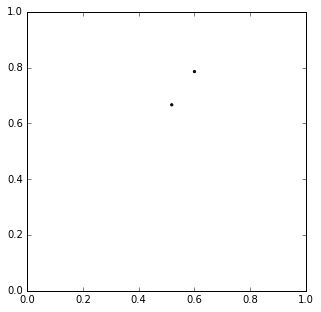

In [45]:
#python has a native function for sensitivity/recall
sens1 = recall_score(expected_m1, predicted_m1)
sens2 = recall_score(expected_m2, predicted_m2)
print(sens1,sens2)

#but we have to define our own for specificity
def getSpec(exp,pre):
    cm = confusion_matrix(exp, pre)
    return cm[0,1]/(cm[0,1]+cm[1,1])

spec1 = getSpec(expected_m1, predicted_m1)
spec2 = getSpec(expected_m2, predicted_m2)
print(spec1,spec2)

#So our amateur ROC curve goes like
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(x=[1-spec1,1-spec2],y=[sens1,sens2],s=[5,5],c=[1,2])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

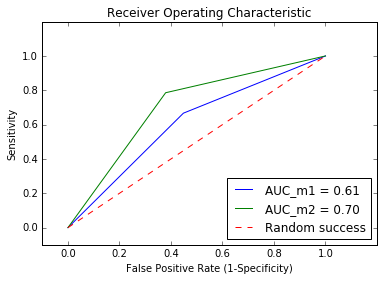

In [40]:
#or how about we use the native ROC function from scikit
fp1, tp1, thr1 = roc_curve(expected_m1, predicted_m1)
roc_auc1 = auc(fp1, tp1)
fp2, tp2, thr2 = roc_curve(expected_m2, predicted_m2)
roc_auc2 = auc(fp2, tp2)

#plotting well is a lot of code, ugh
plt.title('Receiver Operating Characteristic ROC Curve')
plt.plot(fp1, tp1, 'b',label='AUC_m1 = %0.2f'% roc_auc1)
plt.plot(fp2, tp2, 'g',label='AUC_m2 = %0.2f'% roc_auc2)
plt.plot([0,1],[0,1],'r--',label='Random success')
plt.legend(loc='lower right')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('Sensitivity')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

### Enter Cross-Validation

K-Cross-validation = multiple test sets derived from the training set during the fitting process

+ prevents an 'unlucky' test set
+ improves generalization
+ K depends on your data+ # of predictors, usually 5-10
+ Returns an 'averaged' model, not the best one!

4-Fold Cross-validation below. Note that this only splits the training set - the test set remains untouched by the model until the first fit.

![](http://srv-marketing1.muc.ecircle.de/utils/traincv.png)

In [68]:
from sklearn.linear_model import LogisticRegressionCV

#lets use logistic regression as a competing model
model2_lr2 = LogisticRegressionCV(cv=5,penalty='l1', solver='liblinear', Cs=[0.01, 0.001], refit=True)
model2_lr2 = model2_lr2.fit(train[['pred1','pred2','pred3']],train['resp'])

expected_m21 = test['resp']
predicted_m21 = model2_lr2.predict(test[['pred1','pred2','pred3']])

print("Accuracy is "+ str(getAccuracy(expected_m21,predicted_m21)))


Accuracy is 0.68


Well, cross-validation did not help extremely this time, but you will appreciate it as a means of reducing our test error when data becomes more stratified and generally harder to grasp.

That's it for today. Thank you.

### References

[Scikit-Learn Metrics module](http://scikit-learn.org/stable/modules/model_evaluation.html)  
[Measuring performance with caret Library for R](http://topepo.github.io/caret/other.html)  
[Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)  